# Rating Problem: Grant or not, bank loans to clients.

## Python libraries

In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
from ml_utils import plot_confusion_matrix

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model, svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Reading data

In [14]:
filename='bank-additional-full2.csv'
data = pd.read_csv(filename, delimiter=';')

In [15]:
for col in data.columns:
    print(col, end=" , ")

age , job , marital , education , default , housing , loan , contact , month , day_of_week , duration , campaign , pdays , previous , poutcome , emp.var.rate , cons.price.idx , cons.conf.idx , euribor3m , nr.employed , y , 

In [16]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0



# Attributes:

* 1 - age: age (numeric)
* 2 - job: type of job (categorical: 'admin', 'blue collar', 'entrepreneur', 'maid', 'management', 'retired' 'technical', 'unemployed', 'unknown')
* 3 - marital: civil status (categorical: 'divorced', 'married', 'single', 'unknown', note: 'divorced' means divorced or widowed)
* 4 - education: education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional', 'university', 'unknown')
* 5 - default: default: credit default? (categorical: 'no', 'yes', 'unknown')
* 6 - housing: had mortgage loan? (categorical: 'no', 'yes', 'unknown')
* 7 - loan: did you have another loan? (categorical: 'no', 'yes', 'unknown')

** Related to the last contact of the current campaign: **
* 8 - contact: contact, type of contact communication (categorical: 'cellular', 'telephone')
* 9 - month: months, last contact month of the year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: days of the week, the last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
* 11 - duration: duration, last duration of the contact, in seconds (numeric). Important Note: This attribute greatly affects the output target (for example, if duration = 0 then y = 'no'). However, the duration is not known before a call is made. In addition, after the end of the call, obviously, is known. Thus, this input should only be included for reference purposes and should be discarded if the intention is to have a realistic predictive model.

** Other attributes: **
* 12 - campaign: number of contacts made during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: days, number of days that passed after the last customer contact in a previous campaign (numeric, 999 means the customer was not contacted previously)
* 14 - previous: previous, number of contacts made before this campaign and for this client (numeric)
* 15 - poutcome: result of previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

** Attributes of social and economic context **
* 16 - emp.var.rate: employment rate of change - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: Euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly (numeric)

### Analyzing attributes

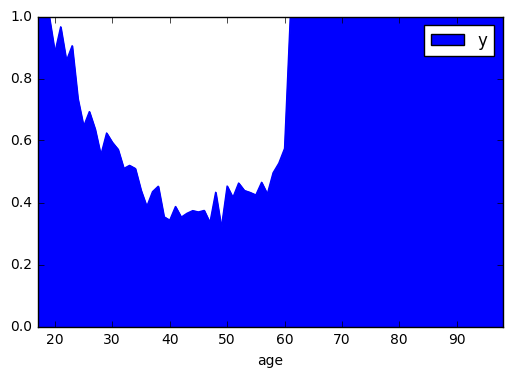

In [17]:
data[['y',"age"]].groupby("age")\
                 .mean()\
                 .plot(kind="area")

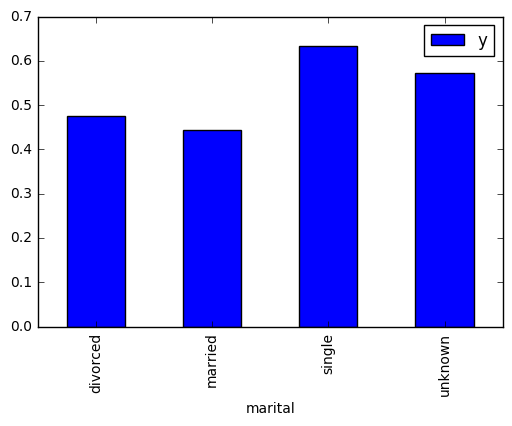

In [18]:
data[['y',"marital"]].groupby("marital")\
                 .mean()\
                 .plot(kind="bar")

# Pre-processing attributes

### Selection of categorical and real attributes

In [19]:
categorical = ['job', 'marital', 'education']
real        = ['age']
atributes   = real + categorical
df = data[atributes].copy()
df.head()

,age,job,marital,education
0,56.0,housemaid,married,basic.4y
1,57.0,services,married,high.school
2,37.0,services,married,high.school
3,40.0,admin.,married,basic.6y
4,56.0,services,married,high.school


### Factorize

In [20]:
for cat in categorical:
    df[cat] = pd.factorize(df[cat])[0]

df.head()

,age,job,marital,education
0,56.0,0,0,0
1,57.0,1,0,1
2,37.0,1,0,1
3,40.0,2,0,2
4,56.0,1,0,1


### Coding the categorical attributes

In [21]:
categorical_index = [atributes.index(x) for x in categorical]
enc = OneHotEncoder(categorical_features = categorical_index)

X = enc.fit_transform(df)
y = data['y']

In [22]:
categorical_index

[1, 2, 3]

## Creating training and test dataset

In [23]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

## Training the model

In [26]:
# classifier = linear_model.LogisticRegressionCV()
# classifier = svm.LinearSVC()
classifier = RandomForestClassifier(n_estimators=50, n_jobs=-1)

# Training
classifier.fit(train_x.toarray(), train_y)

# Predicting
pr = classifier.predict(test_x.toarray())

# Results
cm = confusion_matrix(test_y, pr)
print("accuracy = %0.2f" % (accuracy_score(list(test_y), list(pr))))

accuracy = 0.66


Confusion matrix
Matriz de confusão Normalizada
[[0.68356075 0.31643925]
 [0.37007874 0.62992126]]


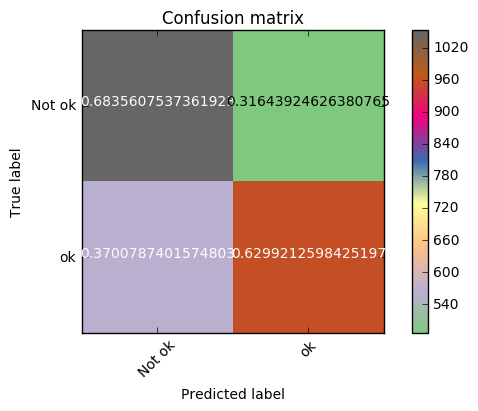

In [31]:
print("Confusion matrix")
plot_confusion_matrix(cm, ['Not ok','ok'], normalize=True)